Nome : Paulo Assis De Santana

Email: pas3@cesar.school

Link do Dataset Escolhido: **Arabic Handwritten Characters Dataset** (https://www.kaggle.com/datasets/mloey1/ahcd1)

# Importação das bibliotecas

In [23]:
!pip install mplcursors

In [31]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import time
import mplcursors
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Convolution2D, MaxPooling2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop,Adam
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')

# Dataset

In [4]:
#!/bin/bash
!curl -L -o /content/ahcd1.zip https://www.kaggle.com/api/v1/datasets/download/mloey1/ahcd1

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 23.9M  100 23.9M    0     0  28.9M      0 --:--:-- --:--:-- --:--:-- 95.8M


In [5]:
!unzip -q -o /content/ahcd1.zip -d /content/ahcd1

In [6]:
train_images_path = '/content/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv'
train_labels_path = '/content/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv'
test_images_path = '/content/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTestImages 3360x1024.csv'
test_labels_path = '/content/ahcd1/Arabic Handwritten Characters Dataset CSV/csvTestLabel 3360x1.csv'

Train_Images = pd.read_csv(train_images_path, header=None)
Train_Labels = pd.read_csv(train_labels_path, header=None)

Test_Images = pd.read_csv(test_images_path, header=None)
Test_Labels = pd.read_csv(test_labels_path, header=None)

In [7]:
print(f"Train Images Shape : {Train_Images.shape}")
print(f"Test  Images Shape : {Test_Images.shape}")

print(f"Train Labels Shape : {Train_Labels.shape}")
print(f"Test  Labels Shape : {Test_Labels.shape}")

Train Images Shape : (13440, 1024)
Test  Images Shape : (3360, 1024)
Train Labels Shape : (13440, 1)
Test  Labels Shape : (3360, 1)


In [8]:
Train_Images.head()
Test_Images.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(f"Numeros de Classes:", Train_Labels.nunique())

Number of Classes: 0    28
dtype: int64


In [10]:
x_train = Train_Images.to_numpy()
y_train = Train_Labels.to_numpy() -1

x_test = Test_Images.to_numpy()
y_test = Test_Labels.to_numpy() -1
print(f"X_Train Shape : {x_train.shape}")
print(f"X_Test  Shape : {x_test.shape}")
print(f"Y_Train Shape : {y_train.shape}")
print(f"Y_Test  Shape : {y_test.shape}")

X_Train Shape : (13440, 1024)
X_Test  Shape : (3360, 1024)
Y_Train Shape : (13440, 1)
Y_Test  Shape : (3360, 1)


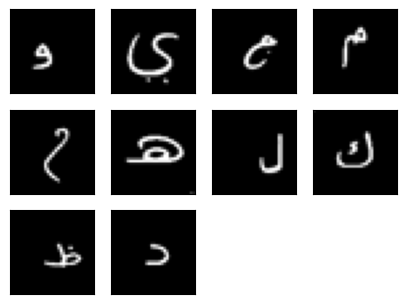

In [11]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(5, 5))
for i in range(10):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32, 32).T, "gray")
plt.show()

# Rede


In [12]:
x_train = x_train.reshape(-1,32,32,1)
x_test  = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test  = x_test / 255.0

In [13]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)
print(y_train.shape, y_test.shape)

(13440, 28) (3360, 28)


In [14]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)
train_gen = datagen.flow(x_train, y_train, batch_size=64)
test_gen  = datagen.flow(x_test , y_test , batch_size=64)

In [15]:
num_classes = 28

In [16]:
model = Sequential()

model.add(Convolution2D(32, (5, 5), padding="same", activation="relu", input_shape=(32, 32, 1)))
model.add(Convolution2D(32, (5, 5), activation="relu"))
model.add(Convolution2D(32, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Convolution2D(64, (5, 5), padding="same", activation="relu"))
model.add(Convolution2D(64, (5, 5), activation="relu"))
model.add(Convolution2D(64, (5, 5), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.4))

model.add(Dense(28, activation="softmax"))

In [17]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [18]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy",metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 32)     │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 12, 12, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,692 (1.38 MB)

 Trainable params: 361,500 (1.38 MB)

 Non-trainable params: 192 (768.00 B)

# Treinamento

In [20]:
StartTime = time.time()

history= model.fit(
    train_gen,
    verbose=1,
    steps_per_epoch=x_train.shape[0] // 64,
    epochs=15,
    validation_data=test_gen,
    validation_steps=x_test.shape[0] // 64
)

EndTime = time.time()

print("###### Total de Tempo Levado: ", round((EndTime - StartTime) / 60), 'Minutos ######')

Epoch 1/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 133s 609ms/step - accuracy: 0.1854 - loss: 2.7739 - val_accuracy: 0.0613 - val_loss: 6.0312
Epoch 2/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 142s 676ms/step - accuracy: 0.6200 - loss: 1.0887 - val_accuracy: 0.4594 - val_loss: 1.7915
Epoch 3/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 189s 615ms/step - accuracy: 0.7830 - loss: 0.6632 - val_accuracy: 0.6695 - val_loss: 0.9230
Epoch 4/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 127s 604ms/step - accuracy: 0.8467 - loss: 0.4769 - val_accuracy: 0.8588 - val_loss: 0.4275
Epoch 5/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 203s 894ms/step - accuracy: 0.8791 - loss: 0.3791 - val_accuracy: 0.8690 - val_loss: 0.4258
Epoch 6/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 141s 672ms/step - accuracy: 0.9042 - loss: 0.3178 - val_accuracy: 0.8984 - val_loss: 0.3496
Epoch 7/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 142s 679ms/step - accuracy: 0.9180 - loss: 0.2691 - val_accuracy: 0.9014 - val_loss: 0.3249
Epoch 8/15
210/210 ━━━━━━━━━━━━━━━━━━━━ 188s 611ms/step - accuracy: 0.9216 -

# Avaliação

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.1267324686050415
Test accuracy: 0.9666666388511658


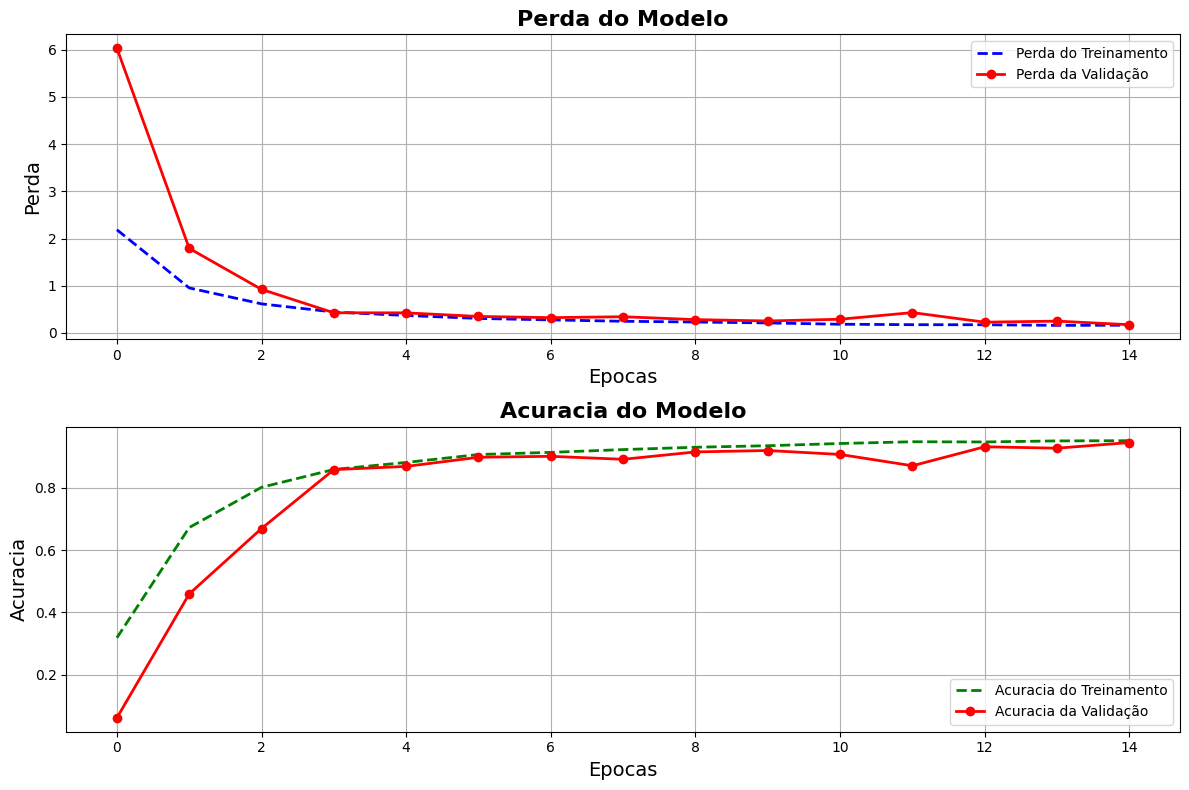

In [38]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
training_loss, = plt.plot(history.history['loss'], label='Perda do Treinamento', color='blue', linestyle='--', linewidth=2)
validation_loss, = plt.plot(history.history['val_loss'], 'ro-', label='Perda da Validação', linewidth=2)
plt.title('Perda do Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Epocas', fontsize=14)
plt.ylabel('Perda', fontsize=14)
plt.legend(loc='upper right')
plt.grid(True)

cursor_loss = mplcursors.cursor([training_loss, validation_loss], hover=True)
cursor_loss.connect("add", lambda sel: sel.annotation.set_text(f'Epoch: {sel.target[0]:.0f}\nLoss: {sel.target[1]:.4f}'))

plt.subplot(2, 1, 2)
training_accuracy, = plt.plot(history.history['accuracy'], label='Acuracia do Treinamento', color='green', linestyle='--', linewidth=2)
validation_accuracy, = plt.plot(history.history['val_accuracy'], 'ro-', label='Acuracia da Validação', linewidth=2)
plt.title('Acuracia do Modelo', fontsize=16, fontweight='bold')
plt.xlabel('Epocas', fontsize=14)
plt.ylabel('Acuracia', fontsize=14)
plt.legend(loc='lower right')
plt.grid(True)

cursor_accuracy = mplcursors.cursor([training_accuracy, validation_accuracy], hover=True)
cursor_accuracy.connect("add", lambda sel: sel.annotation.set_text(f'Epoch: {sel.target[0]:.0f}\nAccuracy: {sel.target[1]:.4f}'))

plt.tight_layout()

plt.show()

O modelo apresentou overfitting moderado entre as épocas 8 e 12, com validação oscilando enquanto o treino continuava melhorando, mas se recuperou nas épocas finais, atingindo 94.6% de val_accuracy com uma diferença mínima para a acurácia de treino (95.2%), indicando boa generalização. O data augmentation e dropout foram eficazes no controle do overfitting, mas a adição de early stopping e ajuste de learning rate poderiam otimizar ainda mais o treinamento. O desempenho final foi excelente para um problema multiclasse (28 classes), com margem para melhorias em casos específicos de caracteres similares.